In [1]:
library(tidyverse)

standardized_data <- read.csv("../data/z_score_data.csv")
standardized_data <- standardized_data[3:27]

standardized_data_all <- read.csv("../data/z_score_data.csv")
standardized_data_all <- standardized_data_all[1:27]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   1.0.1
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### assignments

In [2]:
pc_data <- prcomp(standardized_data, scale = FALSE)

eigen_value <- pc_data$sdev^2

pc_data$rotation <- -pc_data$rotation

loadings <- pc_data$rotation[, 1:4]

pc_tract <- pc_data$x[, 1:4]

### eigen value

In [3]:
eigen_value[1:4]

[1] 8.401848 3.703019 3.006559 1.411363

### loadings

In [4]:
loadings

,PC1,PC2,PC3,PC4
median_income,-0.06543787,0.451689774,-0.053048367,-0.11546258
mean_income,-0.05892118,0.439486946,-0.072082999,-0.09629520
internet_with_subscription,-0.33668618,0.012214271,0.031885733,0.07367151
dialup,-0.03251846,-0.130400755,-0.224470222,-0.34833485
broadband,-0.31755563,0.031252845,0.103118128,0.20580560
satellite,-0.07254968,0.043669244,-0.242454496,-0.55587292
other,-0.11100219,0.073451058,-0.137651627,-0.35544064
internet_without_subscription,-0.10495514,-0.227179658,0.119509269,-0.02083965
no_internet,-0.12680559,-0.347503444,-0.263660813,-0.04607166
total_native,-0.31057773,0.037692284,-0.007303641,0.02875694


### remove variables that don't exceed threshold of sqrt(1/25) = |.2| based on loadings 

In [5]:
loadings <- loadings %>%
    as.data.frame() %>% 
    filter(!(row.names(.) %in% c('with_other', 'only_tablet')))

loadings

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
median_income,-0.06543787,0.451689774,-0.053048367,-0.11546258
mean_income,-0.05892118,0.439486946,-0.072082999,-0.09629520
internet_with_subscription,-0.33668618,0.012214271,0.031885733,0.07367151
dialup,-0.03251846,-0.130400755,-0.224470222,-0.34833485
broadband,-0.31755563,0.031252845,0.103118128,0.20580560
satellite,-0.07254968,0.043669244,-0.242454496,-0.55587292
other,-0.11100219,0.073451058,-0.137651627,-0.35544064
internet_without_subscription,-0.10495514,-0.227179658,0.119509269,-0.02083965
no_internet,-0.12680559,-0.347503444,-0.263660813,-0.04607166


### principal component 1 - 4

In [6]:
head(pc_tract)

PC1,PC2,PC3,PC4
-2.1989489,0.718759024,0.29411088,-0.1789112
1.5599471,2.491098758,0.12922400,-0.1329475
0.4425048,-1.840370635,0.06067167,-0.1549183
1.0644221,-1.910593156,0.21067416,-1.1886610
5.1982744,-3.397962415,0.52925064,1.3271034
-4.5947489,0.007851633,-0.11225918,0.6261189


multiply eigen vectors by eigen values

In [7]:
variable_weights <- loadings

for(i in 1:ncol(variable_weights)){
    variable_weights[, i] <- variable_weights[, i] * eigen_value[i]
}

prove that it worked

In [8]:
variable_weights %>% 
    as.data.frame() %>% 
    mutate(weight = PC1 + PC2 + PC3 +PC4)

,PC1,PC2,PC3,PC4,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
median_income,-0.5497991,1.67261572,-0.15949306,-0.16295957,0.8003640
mean_income,-0.4950468,1.62742842,-0.21672181,-0.13590744,0.7797523
internet_with_subscription,-2.8287862,0.04522967,0.09586635,0.10397722,-2.5837130
dialup,-0.2732152,-0.48287644,-0.67488304,-0.49162678,-1.9226015
broadband,-2.6680543,0.11572987,0.31003077,0.29046632,-1.9518273
satellite,-0.6095514,0.16170803,-0.72895382,-0.78453824,-1.9613355
other,-0.9326236,0.27199065,-0.41385778,-0.50165562,-1.5761464
internet_without_subscription,-0.8818172,-0.84125054,0.35931171,-0.02941230,-1.3931684
no_internet,-1.0654013,-1.28681178,-0.79271187,-0.06502381,-3.2099488


transmute instead of mutate and assign to variable

In [9]:
variable_weights <- variable_weights %>% 
    as.data.frame() %>% 
    transmute(weight = PC1 + PC2 + PC3 + PC4)

In [10]:
variable_weights

,weight
,<dbl>
median_income,0.8003640
mean_income,0.7797523
internet_with_subscription,-2.5837130
dialup,-1.9226015
broadband,-1.9518273
satellite,-1.9613355
other,-1.5761464
internet_without_subscription,-1.3931684
no_internet,-3.2099488


### separate tract and county from dataset to append later

In [10]:
tract_county <- standardized_data_all %>%
    select(tract, county)

head(tract_county)

,tract,county
,<dbl>,<chr>
1,9501.00,adams
2,127.01,spokane
3,113.01,spokane
4,105.07,spokane
5,49.00,spokane
6,9502.00,adams


In [11]:
filtered_standardized_data <- standardized_data_all %>% 
    select(-tract, -county, -with_other, -only_tablet)

head(filtered_standardized_data)

,median_income,mean_income,internet_with_subscription,dialup,broadband,satellite,other,internet_without_subscription,no_internet,total_native,⋯,computer,no_computer,work_from_home,desktop_laptop,only_desktop_laptop,with_smartphone,only_smartphone,with_tablet,only_other,X65_older
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.37527485,-0.5051425,-0.7602276,-0.11230979,-0.9066067,-0.21813555,-0.15230123,0.1937755,-0.1106240,-0.79134866,⋯,-0.6760731,-0.3352009,-0.5191573,-0.8890219,0.08031281,-0.7466512,0.5400941,-0.77593705,-0.1547152,-0.3860114
2,-0.53977395,-0.2257183,0.3437704,0.03971411,0.4976273,-0.50426766,0.05464243,1.1009735,1.0378580,-0.18927099,⋯,0.2960218,2.2867807,-0.9020994,0.3525052,2.27822755,0.1076615,0.2461698,0.07062326,-0.1547152,0.6108278
3,1.38734090,0.8703809,0.2943660,-0.49236954,0.1530057,0.45904378,-0.84211343,-0.7689652,-0.2087848,0.03081936,⋯,0.1225625,0.3046128,-0.8617897,0.4618220,-1.23104808,0.3006941,-1.2587224,0.46263840,-0.1547152,1.4232986
4,0.93409058,1.3372338,0.4083762,-0.49236954,0.8006566,-0.43750350,-0.84211343,-0.1950236,-0.4541869,0.29268957,⋯,0.3484210,-0.4355638,0.2064174,0.5633305,-0.15979552,0.4153669,-0.7179018,0.51554842,-0.1547152,1.1670578
5,1.40546740,2.1175141,1.7707971,0.49578581,1.7988709,0.89777968,3.05532550,-0.5282801,-0.8664625,1.37150531,⋯,1.5499882,-0.5359268,1.6676441,1.8321868,1.07768589,1.5640065,-1.1176388,1.60020381,-0.1547152,2.2670183
6,-0.05501073,-0.6055081,-1.5639990,-0.34034564,-1.6473451,0.02030788,0.33056731,-0.6023370,-0.3167618,-1.43371406,⋯,-1.5343354,-0.4857453,-0.8718671,-1.4863604,-1.15716859,-1.4423331,-0.4592484,-1.44212229,-0.1547152,-1.2516053


### multiply standardized values by variable weights

In [12]:
index <- filtered_standardized_data

for(i in 1:ncol(index)){
    index[, i] <- index[, i] * variable_weights[i,]
}

head(index)

,median_income,mean_income,internet_with_subscription,dialup,broadband,satellite,other,internet_without_subscription,no_internet,total_native,⋯,computer,no_computer,work_from_home,desktop_laptop,only_desktop_laptop,with_smartphone,only_smartphone,with_tablet,only_other,X65_older
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.30035648,-0.3938861,1.9642100,0.2159270,1.7695398,0.42783698,0.24004903,-0.2699619,0.3550973,1.93977293,⋯,1.8840007,0.9239444,0.3052981,2.1571640,-0.2017151,1.8862165,-1.1583724,1.7080204,0.17852,1.078984
2,-0.43201564,-0.1760044,-0.8882041,-0.0763544,-0.9712825,0.98903803,-0.08612446,-1.5338414,-3.3314710,0.46394563,⋯,-0.8249186,-6.3032588,0.5304928,-0.8553349,-5.7220383,-0.2719782,-0.5279753,-0.1554584,0.17852,-1.707394
3,1.11037772,0.6786815,-0.7605573,0.9466304,-0.2986406,-0.90033884,1.32729402,1.0712980,0.6701886,-0.07554515,⋯,-0.3415427,-0.8396315,0.5067881,-1.1205864,3.0919230,-0.7596240,2.6996579,-1.0183762,0.17852,-3.978423
4,0.74761248,1.0427112,-1.0551268,0.9466304,-1.5627435,0.85809112,1.32729402,0.2717008,1.4579168,-0.71744773,⋯,-0.9709384,1.2005837,-0.1213868,-1.3668913,0.4013454,-1.0493145,1.5397272,-1.1348436,0.17852,-3.262175
5,1.12488551,1.6511366,-4.5752316,-0.9531985,-3.5110854,-1.76084712,-4.81564014,0.7359831,2.7813003,-3.36186692,⋯,-4.3193238,1.4772231,-0.9806826,-4.4457031,-2.7067357,-3.9510483,2.3970673,-3.5224258,0.17852,-6.336799
6,-0.04402861,-0.4721463,4.0409245,0.6543490,3.2153332,-0.03983056,-0.52102246,0.8391569,1.0167890,3.51435448,⋯,4.2757046,1.3389034,0.5127143,3.6065739,2.9063659,3.6436726,0.9849778,3.1744512,0.17852,3.498504


### sum the rows

In [13]:
index <- index %>% 
    transmute(index = rowSums(.))

### append dataframes together

In [14]:
pc_index <- bind_cols(tract_county, index)

head(pc_index)

,tract,county,index
,<dbl>,<chr>,<dbl>
1,9501.00,adams,15.1000337
2,127.01,spokane,-22.6682212
3,113.01,spokane,2.2163878
4,105.07,spokane,-0.8484028
5,49.00,spokane,-35.7031179
6,9502.00,adams,36.9788094


In [23]:
# write.csv(pc_index, "../data/pc_index.csv")

### add geometry to the index

In [1]:
source('../R/scripts/get_geometry_data.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Getting data from the 2016-2020 5-year ACS



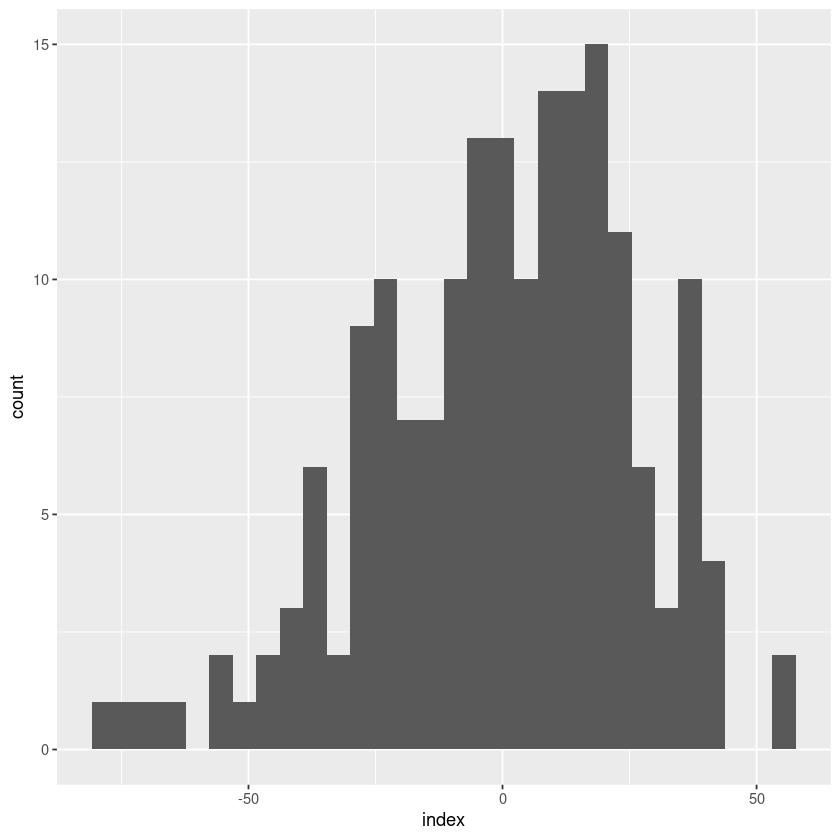

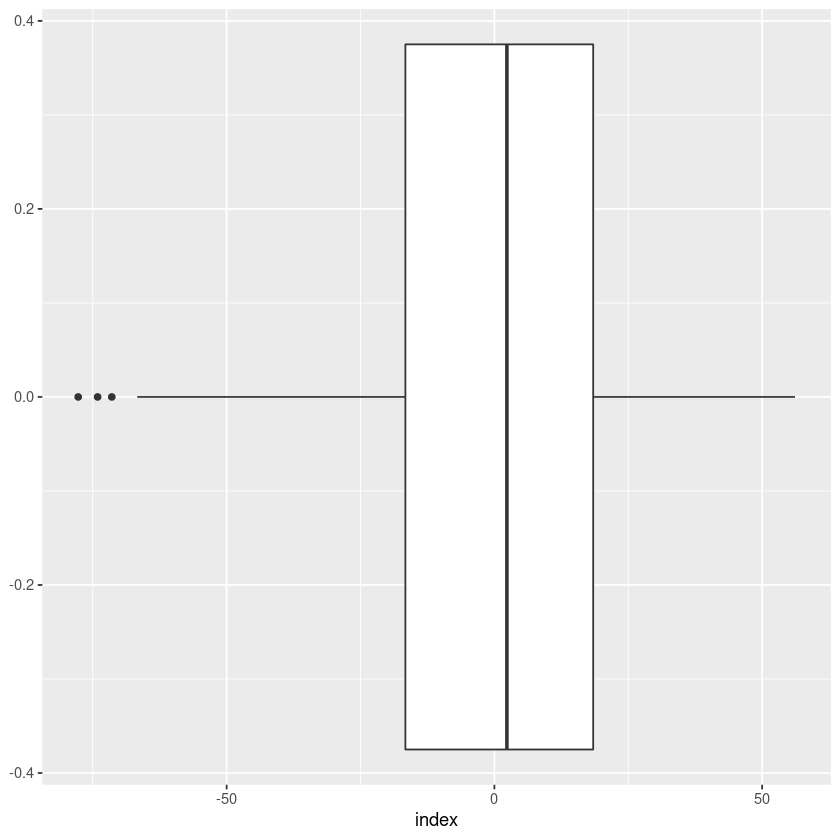

In [30]:
pc_index %>% 
    ggplot(aes(index))+
    geom_histogram(bins = 30)

pc_index %>% 
    ggplot(aes(index)) +
    geom_boxplot()

In [16]:
pc_index %>% 
    arrange(index)

tract,county,index
<dbl>,<chr>,<dbl>
131.01,spokane,-77.72030
117.02,spokane,-74.09181
123.00,spokane,-71.44593
118.00,spokane,-66.68406
112.03,spokane,-56.20167
129.02,spokane,-55.27958
132.01,spokane,-49.32596
103.04,spokane,-45.06293
103.05,spokane,-44.50981
